In [22]:
import scipy.io.wavfile
fs, data = scipy.io.wavfile.read("excerpt.wav")
data = data.astype(np.int32)
len(data)

array([1019, 1024, 1034, ..., -380, -446,  -19], dtype=int32)

In [21]:
fs

16000

## Task 4.1

In [2]:
import numpy as np
import scipy.io.wavfile
fs, data = scipy.io.wavfile.read("excerpt.wav")
data = data.astype(np.int32)
len(data)

1278279

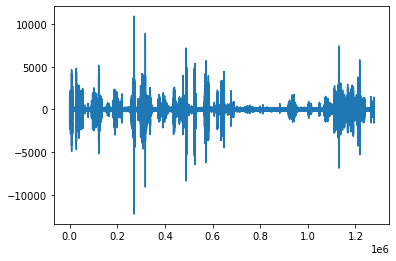

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data)

## Task 4.2

(array([[6.45311024e+03, 1.43596488e+04, 4.61114361e+02, ...,
         1.97181623e+03, 8.70296687e+02, 8.01233753e+02],
        [2.02348989e+04, 1.77569057e+04, 2.05493271e+03, ...,
         1.12700748e+04, 3.60471223e+03, 5.38051489e+02],
        [5.92744766e+03, 6.86983527e+02, 2.37029893e+03, ...,
         4.47864987e+03, 1.59371843e+03, 1.26847888e+03],
        ...,
        [1.61296372e+01, 5.79996917e+01, 6.53383514e+00, ...,
         1.20427960e+01, 1.60652152e+00, 1.96947742e+01],
        [3.04481418e+01, 2.03833997e+01, 2.77337825e+01, ...,
         1.50734008e+01, 1.36506238e+00, 1.06482518e+01],
        [1.72337804e+01, 1.20147556e-01, 1.62730509e+01, ...,
         1.65050650e+00, 1.14017295e-01, 1.74606137e+00]]),
 array([0.00000e+00, 1.25000e-04, 2.50000e-04, ..., 9.99750e-01,
        9.99875e-01, 1.00000e+00]),
 array([  4000.,  11936.,  19872.,  27808.,  35744.,  43680.,  51616.,
         59552.,  67488.,  75424.,  83360.,  91296.,  99232., 107168.,
        115104., 12304

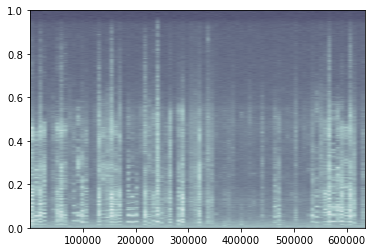

In [4]:
plt.specgram(data, fs, cmap = plt.cm.bone)

# Task 5.1

1600 4800


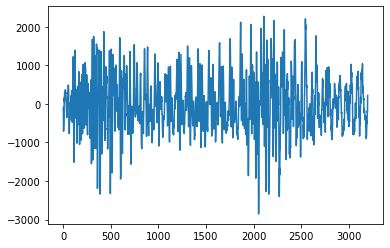

In [42]:
## Wrong. Look at next cell
frame = 0.2
step = 0.1

skip = int(fs * step)
move = int(fs * frame + skip)
print(skip, move)

plt.plot(data[skip:move])

In [5]:
data_chunk = []
for i in range(3200, len(data), 1600):
    #print(i-3200, " ", i)
    data_chunk.append(data[i-1600:i])

## Task 5.2

In [127]:
# Wrong. Look at next cell
def compute_energy(audio, N):
    E = 0
    E_list = []
    for i in range(N): # len(audio)
        E += audio[i]**2
        E_list.append(audio[i]**2)
        
    return E, E_list

energy = compute_energy(data, fs)[1]
np.sort(energy)

array([       0,        0,        0, ..., 20593444, 21603904, 24285184])

In [6]:
def compute_energy(audio_chunk):
    E_list = []
    for i in range(len(audio_chunk)):
        E_list.append((np.power(audio_chunk[i], 2)))#.tolist())
        
    return E_list

energy = compute_energy(data_chunk)
print(energy[1])

[  8836  50176 275625 ... 298116 570025 844561]
[972196 887364 788544 ...  50176   4096  47524]


## Task 5.3

In [128]:
# Wrong. Look at next cell
mean = np.mean(energy)
silent_frames = mean * 0.1
print(mean)
sf_list = []
for i, e in enumerate(energy):
    if e < silent_frames:
        sf_list.append([i, e])
        
sf_list[:5] # The silent frames [frame nr, energy]

567175.6190625


[[15, 45369], [21, 6561], [22, 40401], [30, 7744], [34, 4225]]

In [7]:
mean = np.mean(energy)
silent_frames = mean * 0.1
sf_list = []
for i in range(len(energy)):
    if np.mean(energy[i]) < silent_frames:
        sf_list.append(i)
        
print(sf_list)

546283.941875
[8, 9, 10, 11, 12, 13, 14, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 57, 60, 61, 64, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 104, 105, 106, 107, 108, 109, 110, 111, 112, 132, 133, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 171, 172, 173, 174, 175, 176, 177, 180, 181, 183, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 241, 242, 246, 249, 255, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 282, 283, 284, 285, 289, 290, 291, 298, 312, 313, 314, 315, 316, 317, 318, 320, 321, 322, 323, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 379, 380, 381, 382, 383, 389, 390, 391, 393, 394, 406, 407, 408, 409, 410, 411, 412, 415, 416, 417, 418, 419, 420, 423, 424, 425, 426, 428, 430, 431

## Task 5.4

In [82]:
data_chunk2 = []
for i in sf_list:
    j = 0
    for chunk in range(3200, len(data), 1600):
        if i == j:
            #print(chunk-1600, chunk)
            data_chunk2.append([chunk-1600, chunk])
        j += 1

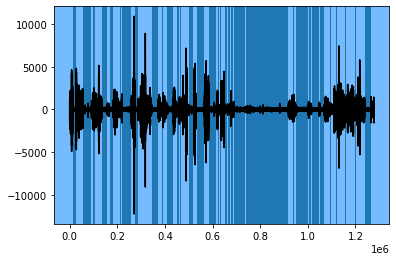

In [92]:
def segments(data_chunk):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    
    plt.plot(data, color="k")
    for i in data_chunk:
        s1 = i[0]
        s2 = i[1]
                
        plt.hlines(y=0, xmin=s1, xmax=s2, linewidth=1000)
        
    ax.set_facecolor("xkcd:sky blue")
        
segments(data_chunk2)

## Task 5.5

In [100]:
ssf_list = []
# Any better ways of doing this?
for i in range(5, len(energy)):
    #if all([np.mean(energy[i-5]),np.mean(energy[i-4]),np.mean(energy[i-3]),np.mean(energy[i-2]),np.mean(energy[i-1]),np.mean(energy[i-5]),np.mean(energy[i]),np.mean(energy[i+1]),np.mean(energy[i+2]),np.mean(energy[i+3]), np.mean(energy[i+4]), np.mean(energy[i+5])]) < silent_frames:
    if np.mean(energy[i-5]) < silent_frames:
        if np.mean(energy[i-4]) < silent_frames:
            if np.mean(energy[i-3]) < silent_frames:
                if np.mean(energy[i-2]) < silent_frames:
                    if np.mean(energy[i-1]) < silent_frames:
                        if np.mean(energy[i]) < silent_frames:
                            if np.mean(energy[i+1]) < silent_frames:
                                if np.mean(energy[i+2]) < silent_frames:
                                    if np.mean(energy[i+3]) < silent_frames:
                                        if np.mean(energy[i+4]) < silent_frames:
                                            if np.mean(energy[i+5]) < silent_frames:
                                                ssf_list.append(i)
        

In [101]:
data_chunk3 = []
for i in ssf_list:
    j = 0
    for chunk in range(3200, len(data), 1600):
        if i == j:
            #print(chunk-1600, chunk)
            data_chunk3.append([chunk-1600, chunk])
        j += 1
        
print(data_chunk3)

[[64000, 65600], [65600, 67200], [67200, 68800], [144000, 145600], [145600, 147200], [147200, 148800], [148800, 150400], [228800, 230400], [230400, 232000], [232000, 233600], [233600, 235200], [235200, 236800], [236800, 238400], [238400, 240000], [240000, 241600], [241600, 243200], [243200, 244800], [244800, 246400], [246400, 248000], [248000, 249600], [352000, 353600], [353600, 355200], [355200, 356800], [356800, 358400], [358400, 360000], [360000, 361600], [422400, 424000], [424000, 425600], [425600, 427200], [540800, 542400], [542400, 544000], [544000, 545600], [545600, 547200], [547200, 548800], [548800, 550400], [550400, 552000], [552000, 553600], [553600, 555200], [555200, 556800], [593600, 595200], [595200, 596800], [596800, 598400], [697600, 699200], [699200, 700800], [700800, 702400], [702400, 704000], [704000, 705600], [705600, 707200], [707200, 708800], [708800, 710400], [710400, 712000], [712000, 713600], [713600, 715200], [715200, 716800], [716800, 718400], [718400, 720000

## Task 5.6

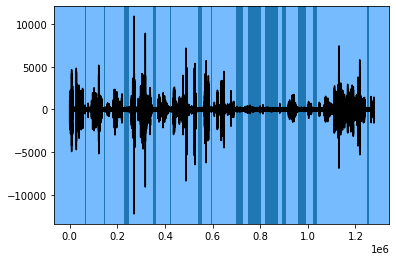

In [102]:
segments(data_chunk3)